<a href="https://colab.research.google.com/github/Mrsnellek/MSDS_686_22F8W2/blob/23S8W1/MSDS%20686/Week_3/MNIST_Regularization_and_Dropout_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits Regularization and Dropout Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Use the MNIST digit dataset to classify digits 0 - 9 into 10 different categories.  Use regularization and early stopping to improve your neural network.

<div class="alert alert-block alert-info">
Some markdown cells might not match results as I had to rerun the notebook after writing them.
</div>

In [1]:
# Import all the necessary libraries 
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

2025-01-30 13:09:21.559938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738210161.574362   42198 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738210161.579377   42198 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 13:09:21.595709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import the MNIST data set from the Keras library. https://keras.io/datasets/
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

I'll be using the fashion mnist dataset instead for this assignment.

In [3]:
# Reshape and normalize the images for your neural net

I'm gonna just add a scale and flatten layer to the model

In [4]:
# Convert the labels into categorical values.

I'd rather not. I'll use sparse categorical crossentropy loss.

In [5]:
# Split the data into training and validation

BATCH_SIZE = 64
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE).prefetch(1)
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000, reshuffle_each_iteration=False)
val_ds = train_ds.skip(train_ds.cardinality().numpy() * .8).batch(BATCH_SIZE).prefetch(1)
train_ds = train_ds.take(train_ds.cardinality().numpy() * .8).shuffle(10000).batch(BATCH_SIZE).prefetch(1)
train_ds.cardinality().numpy() * BATCH_SIZE, val_ds.cardinality().numpy() * BATCH_SIZE, test_ds.cardinality().numpy() * BATCH_SIZE

I0000 00:00:1738210164.147120   42198 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10192 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:10:00.0, compute capability: 8.9


(np.int64(48000), np.int64(12032), np.int64(10048))

## In each Jupyter Notebook cell build a model using your test and validation data, show loss and accuracy monitoring graphs, and evaluate your model on the test data *all in one cell*.  

## Build at least 7 different models. Use markdown above the code cell to explain what you are changing/testing in the subsequent model. 

## Build models with different learning rates, batch sizes, dropout, regularization, and hidden layers and nodes.  Be strategic in how you go about optimizing your model. The last model of your notebook should be your best model. 


I'm not going to evaluate each model on the test data, because that would mean overfitting the hyperparameters to the test data which will make the accuracy not generalize to new data. That's what the validation set is for, so that each model doesn't have be measured using the test set.

I'll use the best model I found using the mnist dataset as a starting point.

# Model 1

Epoch 1/100


I0000 00:00:1738210165.873001   42273 service.cc:148] XLA service 0x7d196000d0d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738210165.873040   42273 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-01-30 13:09:25.895577: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738210166.019297   42273 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-30 13:09:26.753690: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_173', 56 bytes spill stores, 56 bytes spill loads

2025-01-30 13:09:26.856740: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_173', 8 bytes sp

143/750 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5794 - loss: 1.1511

I0000 00:00:1738210169.565073   42273 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


736/750 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7235 - loss: 0.7599

2025-01-30 13:09:33.147676: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 32 bytes spill stores, 32 bytes spill loads

2025-01-30 13:09:33.296693: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 300 bytes spill stores, 300 bytes spill loads

2025-01-30 13:09:34.224281: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 608 bytes spill stores, 720 bytes spill loads



750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7248 - loss: 0.7564 - val_accuracy: 0.8428 - val_loss: 0.4218
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8399 - loss: 0.4451 - val_accuracy: 0.8630 - val_loss: 0.3726
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8532 - loss: 0.4024 - val_accuracy: 0.8754 - val_loss: 0.3491
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3782 - val_accuracy: 0.8710 - val_loss: 0.3512
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3674 - val_accuracy: 0.8777 - val_loss: 0.3455
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.3500 - val_accuracy: 0.8823 - val_loss: 0.3214
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8717 - loss: 0.3422 - val_accuracy: 0.8808 - val_loss: 0.3156
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8792 - loss: 0.3270 - val_accuracy: 0.885

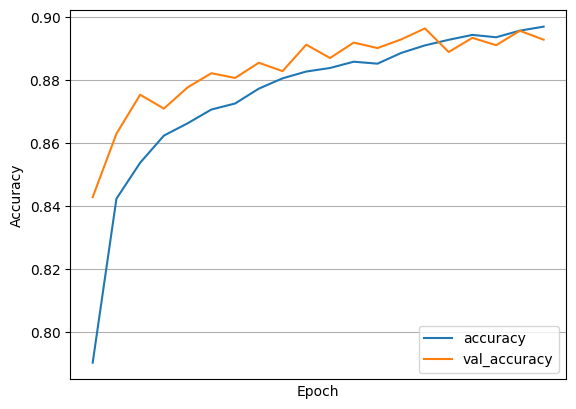

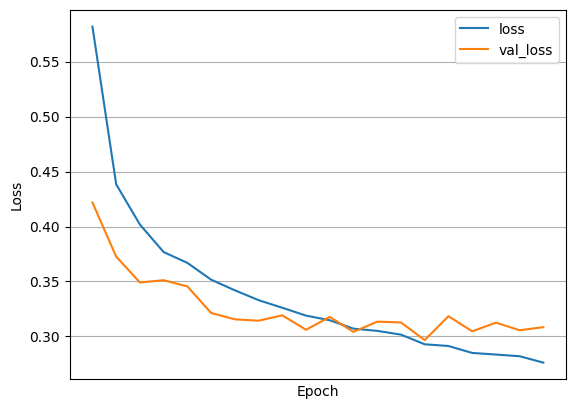

Best validation accuracy: 0.8964999914169312 at epoch 15


In [6]:
model1 = keras.Sequential()
model1.add(keras.layers.Input(shape=(28, 28)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Rescaling(1./255))
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.3))
model1.add(keras.layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
hist = model1.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(
        'val_accuracy', 
        patience=5,
        restore_best_weights=True
    )]
)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

I'm going to try the swish activation and add he normal kernel initialization.

# Model 2

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7432 - loss: 0.7018 - val_accuracy: 0.8354 - val_loss: 0.4490
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8429 - loss: 0.4316 - val_accuracy: 0.8563 - val_loss: 0.3746
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8582 - loss: 0.3810 - val_accuracy: 0.8776 - val_loss: 0.3334
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3639 - val_accuracy: 0.8777 - val_loss: 0.3372
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8705 - loss: 0.3491 - val_accuracy: 0.8758 - val_loss: 0.3388
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8747 - loss: 0.3334 - val_accuracy: 0.8702 - val_loss: 0.3344
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8804 - loss: 0.3227 - val_accuracy: 0.8870 - val_loss: 0.3045
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8833 - loss: 0.3119 - val_accu

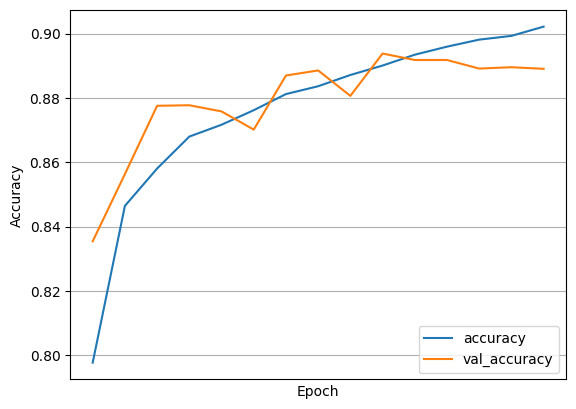

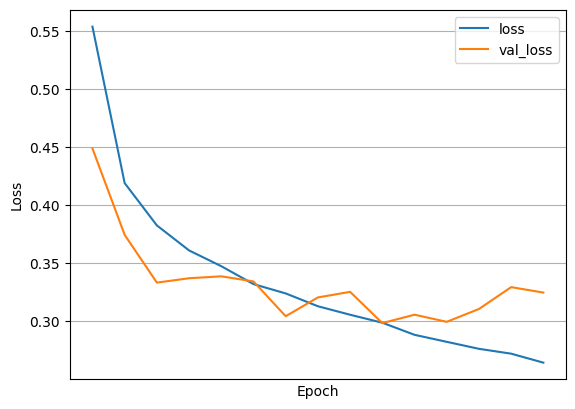

Best validation accuracy: 0.893833339214325 at epoch 10


In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(28, 28)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Rescaling(1./255))
model2.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
hist = model2.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(
        'val_accuracy', 
        patience=5,
        restore_best_weights=True
    )]
)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

That's not much different than the last model. What will happen if I add another layer and use Nadam optimizer?

# Model 3

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7442 - loss: 0.7169 - val_accuracy: 0.8630 - val_loss: 0.3797
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8416 - loss: 0.4394 - val_accuracy: 0.8664 - val_loss: 0.3710
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.3947 - val_accuracy: 0.8721 - val_loss: 0.3489
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3711 - val_accuracy: 0.8813 - val_loss: 0.3279
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.3506 - val_accuracy: 0.8798 - val_loss: 0.3255
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8749 - loss: 0.3446 - val_accuracy: 0.8810 - val_loss: 0.3346
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8800 - loss: 0.3316 - val_accuracy: 0.8817 - val_loss: 0.3239
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8778 - loss: 0.3277 - val_accu

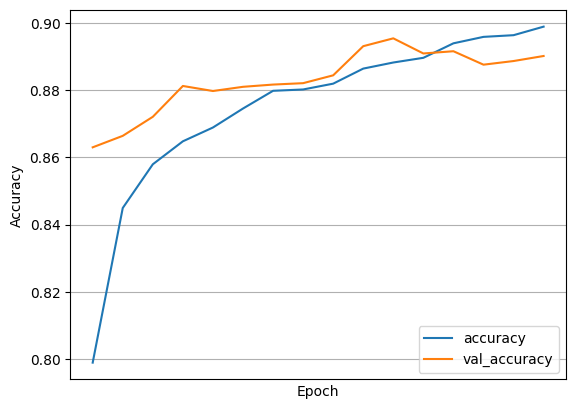

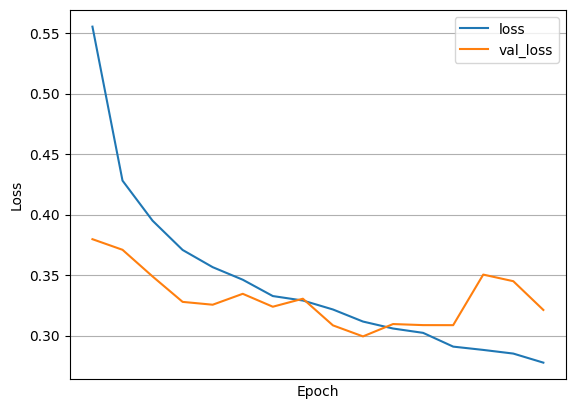

Best validation accuracy: 0.8954166769981384 at epoch 11


In [8]:
model3 = keras.Sequential()
model3.add(keras.layers.Input(shape=(28, 28)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Rescaling(1./255))
model3.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Dense(10, activation='softmax'))

model3.compile(
    optimizer='nadam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
hist = model3.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(
        'val_accuracy', 
        patience=5,
        restore_best_weights=True
    )]
)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

That's worse. I'm going to try the same architechture with adam.

# Model 4

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7332 - loss: 0.7434 - val_accuracy: 0.8429 - val_loss: 0.4349
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.4458 - val_accuracy: 0.8617 - val_loss: 0.3734
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.4101 - val_accuracy: 0.8655 - val_loss: 0.3773
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3874 - val_accuracy: 0.8809 - val_loss: 0.3256
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3613 - val_accuracy: 0.8743 - val_loss: 0.3542
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3553 - val_accuracy: 0.8768 - val_loss: 0.3420
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8766 - loss: 0.3423 - val_accuracy: 0.8808 - val_loss: 0.3376
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8805 - loss: 0.3328 - val_accu

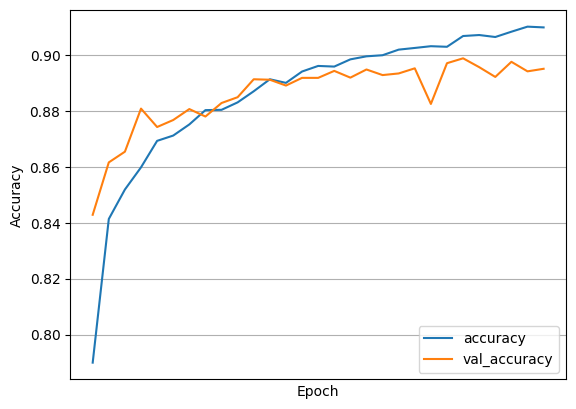

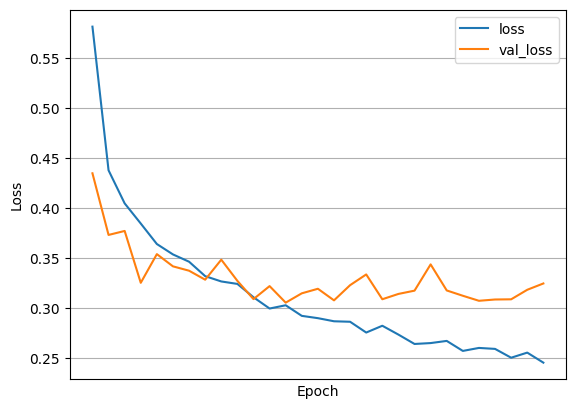

Best validation accuracy: 0.8989166617393494 at epoch 24


In [9]:
model4 = keras.Sequential()
model4.add(keras.layers.Input(shape=(28, 28)))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Rescaling(1./255))
model4.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
hist = model4.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(
        'val_accuracy', 
        patience=5,
        restore_best_weights=True
    )]
)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

The second model is still the best. How about AdamW?

# Model 5

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7325 - loss: 0.7369 - val_accuracy: 0.8532 - val_loss: 0.3981
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8369 - loss: 0.4419 - val_accuracy: 0.8649 - val_loss: 0.3712
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8540 - loss: 0.4056 - val_accuracy: 0.8731 - val_loss: 0.3535
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3810 - val_accuracy: 0.8680 - val_loss: 0.3613
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8690 - loss: 0.3623 - val_accuracy: 0.8748 - val_loss: 0.3462
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3514 - val_accuracy: 0.8840 - val_loss: 0.3291
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8753 - loss: 0.3421 - val_accuracy: 0.8827 - val_loss: 0.3289
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8804 - loss: 0.3292 - val_accu

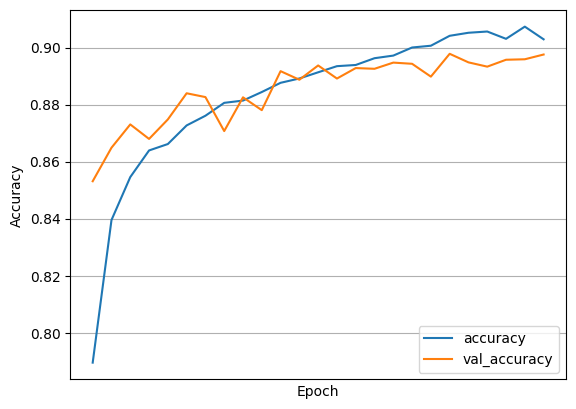

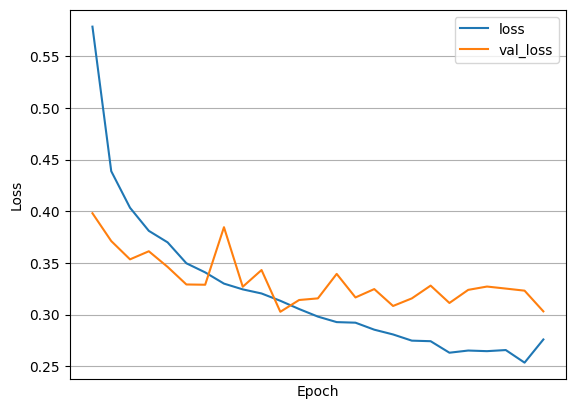

Best validation accuracy: 0.8978333473205566 at epoch 20


In [10]:
model5 = keras.Sequential()
model5.add(keras.layers.Input(shape=(28, 28)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Rescaling(1./255))
model5.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(512, activation='swish', kernel_initializer='he_normal'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(10, activation='softmax'))

model5.compile(
    optimizer='adamw', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
hist = model5.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(
        'val_accuracy', 
        patience=5,
        restore_best_weights=True
    )]
)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Second model is still the best. Back to adam and relu. I'll now add batch normalization.

# Model 6

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7290 - loss: 0.7703 - val_accuracy: 0.8453 - val_loss: 0.4209
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.4492 - val_accuracy: 0.8519 - val_loss: 0.4124
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.4075 - val_accuracy: 0.8660 - val_loss: 0.3649
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.3717 - val_accuracy: 0.8744 - val_loss: 0.3347
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8746 - loss: 0.3480 - val_accuracy: 0.8831 - val_loss: 0.3172
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.3346 - val_accuracy: 0.8792 - val_loss: 0.3300
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8817 - loss: 0.3241 - val_accuracy: 0.8559 - val_loss: 0.3923
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.3105 - val_accu

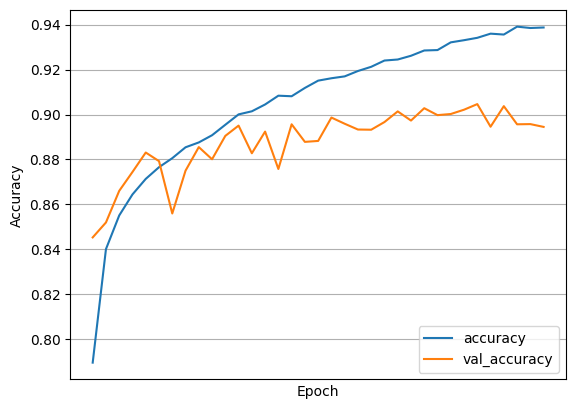

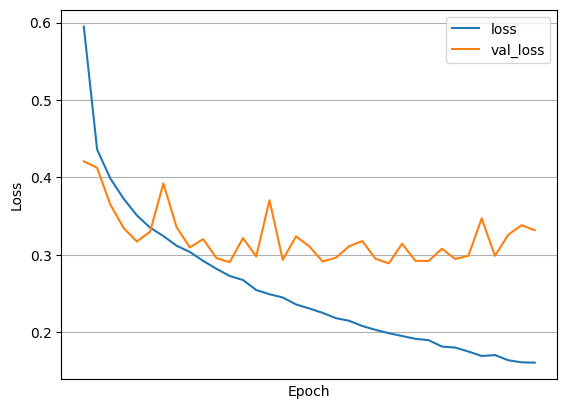

Best validation accuracy: 0.9046666622161865 at epoch 30


In [11]:
model6 = keras.Sequential()
model6.add(keras.layers.Input(shape=(28, 28)))
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Rescaling(1./255))

model6.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation('relu'))
model6.add(keras.layers.Dropout(0.3))

model6.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation('relu'))
model6.add(keras.layers.Dropout(0.3))

model6.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation('relu'))
model6.add(keras.layers.Dropout(0.3))

model6.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation('relu'))
model6.add(keras.layers.Dropout(0.3))

model6.add(keras.layers.Dense(10, activation='softmax'))

model6.compile(
    optimizer='adamw', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
hist = model6.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(
        'val_accuracy', 
        patience=5,
        restore_best_weights=True
    )]
)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Well, that didn't work. Maybe without the dropout?

# Model 7

Epoch 1/100


2025-01-30 13:12:50.496036: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1294', 4 bytes spill stores, 4 bytes spill loads

2025-01-30 13:12:50.839004: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1285', 440 bytes spill stores, 440 bytes spill loads

2025-01-30 13:12:50.846572: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1285', 496 bytes spill stores, 496 bytes spill loads



750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8014 - loss: 0.5615 - val_accuracy: 0.8527 - val_loss: 0.4193
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8695 - loss: 0.3514 - val_accuracy: 0.8752 - val_loss: 0.3441
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.3156 - val_accuracy: 0.8782 - val_loss: 0.3411
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.2826 - val_accuracy: 0.8875 - val_loss: 0.3145
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.2617 - val_accuracy: 0.8789 - val_loss: 0.3471
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9086 - loss: 0.2415 - val_accuracy: 0.8775 - val_loss: 0.3419
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9122 - loss: 0.2264 - val_accuracy: 0.8788 - val_loss: 0.3587
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.2122 - val_accuracy: 0.8783

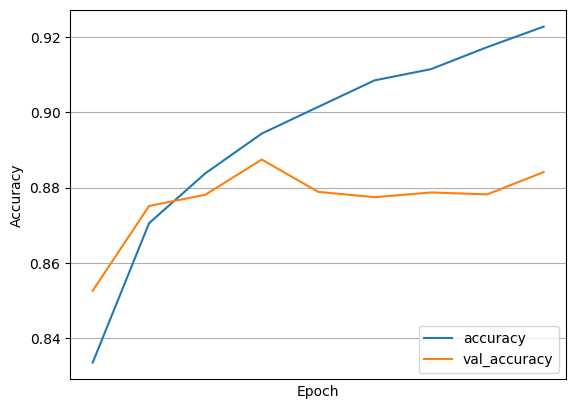

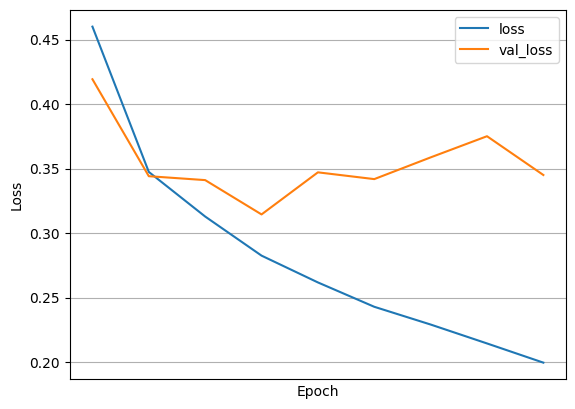

Best validation accuracy: 0.887499988079071 at epoch 4


In [12]:
model7 = keras.Sequential()
model7.add(keras.layers.Input(shape=(28, 28)))
model7.add(keras.layers.Flatten())
model7.add(keras.layers.Rescaling(1./255))

model7.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Activation('relu'))

model7.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Activation('relu'))

model7.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Activation('relu'))

model7.add(keras.layers.Dense(512, kernel_initializer='he_normal', use_bias=False))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Activation('relu'))

model7.add(keras.layers.Dense(10, activation='softmax'))

model7.compile(
    optimizer='adamw', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
hist = model7.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(
        'val_accuracy', 
        patience=5,
        restore_best_weights=True
    )]
)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

I still haven't been able to improve on the second model. From here I'm going to use keras tuner to find the best hyperparameters.

# Keras Tuner

In [13]:
def model_builder(hp):
    n_hidden = hp.Int('n_hidden', min_value=2, max_value=6, step=2)
    n_units = hp.Int('n_units', min_value=64, max_value=512, step=2, sampling='log')
    activation = hp.Choice('activation', values=['relu', 'swish'])
    learning_rate = hp.Float('learning_rate', min_value=1e-3, max_value=1e-2, step=10,sampling='log')
    dropout = hp.Float('dropout', min_value=0.0, max_value=0.8, step=0.2)
    batch_norm = hp.Boolean('batch_norm')
    optimizer = hp.Choice('optimizer', values=['adam', 'nadam', 'adamw'])
    optimizer = keras.optimizers.get(optimizer)
    optimizer.learning_rate = learning_rate
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    for _ in range(n_hidden):
        if batch_norm:
            model.add(keras.layers.Dense(int(n_units), use_bias=False))
            model.add(keras.layers.BatchNormalization())
            model.add(keras.layers.Activation(activation))
            model.add(keras.layers.Dropout(dropout))
        else:
            model.add(keras.layers.Dense(int(n_units), activation=activation))
            model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

<div class="alert alert-block alert-warning">
<b>Warning:</b> Running the next cell will create a folder in your working directory and save results of the hyperparameter search
</div>

In [14]:
tuner = kt.BayesianOptimization(model_builder, objective='val_accuracy', seed=8675309, overwrite=True, project_name='fashion_mnist', max_trials=50)
tuner.search(train_ds, validation_data=val_ds, epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy', patience=5, restore_best_weights=True)])

Trial 50 Complete [00h 00m 41s]
val_accuracy: 0.8768333196640015

Best val_accuracy So Far: 0.8985000252723694
Total elapsed time: 00h 34m 06s


In [15]:
best_trial = tuner.oracle.get_best_trials()[0]
best_trial.summary()

Trial 16 summary
Hyperparameters:
n_hidden: 2
n_units: 256
activation: swish
learning_rate: 0.01
dropout: 0.4
batch_norm: True
optimizer: adam
Score: 0.8985000252723694


In [16]:
best_model = tuner.get_best_models()[0]
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
best_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy', patience=5, restore_best_weights=True)])

Epoch 1/100


/home/chandon/miniconda3/envs/tf-test/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9277 - loss: 0.1949 - val_accuracy: 0.9079 - val_loss: 0.2857
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9353 - loss: 0.1729 - val_accuracy: 0.9086 - val_loss: 0.2853
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.1668 - val_accuracy: 0.9072 - val_loss: 0.2918
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9399 - loss: 0.1629 - val_accuracy: 0.9052 - val_loss: 0.2950
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1561 - val_accuracy: 0.9056 - val_loss: 0.2987
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9408 - loss: 0.1579 - val_accuracy: 0.9060 - val_loss: 0.2957
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9414 - loss: 0.1597 - val_accuracy: 0.9060 - val_loss: 0.2966


In [17]:
best_model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
best_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy', patience=5, restore_best_weights=True)])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9408 - loss: 0.1608 - val_accuracy: 0.9082 - val_loss: 0.2880
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9370 - loss: 0.1681 - val_accuracy: 0.9090 - val_loss: 0.2883
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9390 - loss: 0.1651 - val_accuracy: 0.9090 - val_loss: 0.2886
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9378 - loss: 0.1643 - val_accuracy: 0.9091 - val_loss: 0.2888
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.1641 - val_accuracy: 0.9084 - val_loss: 0.2886
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9396 - loss: 0.1609 - val_accuracy: 0.9075 - val_loss: 0.2889
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9391 - loss: 0.1578 - val_accuracy: 0.9084 - val_loss: 0.2904
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9400 - loss: 0.1621 - val_accu

In [18]:
_, accuracy = best_model.evaluate(test_ds)
print(f'Test accuracy: {accuracy * 100:.2f}%')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.3262
Test accuracy: 89.97%


In [19]:
_, accuracy = model1.evaluate(test_ds)
print(f'Test accuracy: {accuracy * 100:.2f}%')

108/157 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8868 - loss: 0.3178

2025-01-30 13:53:32.082026: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 32 bytes spill stores, 32 bytes spill loads

2025-01-30 13:53:32.399181: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 316 bytes spill stores, 396 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8852 - loss: 0.3211
Test accuracy: 88.35%


### Comment on which techniques/methods you used to build the best model with the highest accuracy.  

I tried different activations, different optimizers, and batch normalization. In the end it was hard to get much improvement past what my best model on MNIST did. The keras tuner took a long time, but I let it run in the background while I researched some things. The tuner found that swish activation, with batch normalization, and adam did the best, at least with that architechture.